In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})

In [3]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
df_total_missing = df.isnull().sum()
df_percent_missing = df_total_missing / df.isnull().count() * 100

df_percent_missing = round(df_percent_missing, 1).sort_values(ascending=False)
missing_data = pd.concat([df_total_missing, df_percent_missing], axis=1, keys=['Total Missing', '%']).sort_values('%', ascending=False)

missing_data.head(5)

,Total Missing,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


/home/hieudong/miniconda3/envs/dm38/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

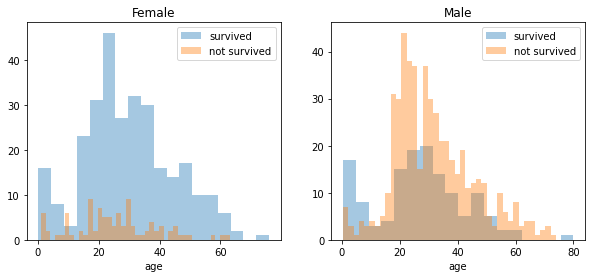

In [7]:
survived = 'survived'
not_survived = 'not survived'

women = df[df['sex'] == 'female']
men = df[df['sex'] == 'male']

women_survived = women[women['survived'] == 1]
women_not_survived = women[women['survived'] == 0]

men_survived = men[men['survived'] == 1]
men_not_survived = men[men['survived'] == 0]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# First plot
ax = sns.distplot(women_survived['age'].dropna(), kde=False, ax=axes[0], label=survived, bins=18)
ax = sns.distplot(women_not_survived['age'].dropna(), kde=False, ax=axes[0], label=not_survived, bins=40)
ax.legend()
ax.set_title('Female')

# Second plot
ax = sns.distplot(men_survived['age'].dropna(), kde=False, ax=axes[1], label=survived, bins=18)
ax = sns.distplot(men_not_survived['age'].dropna(), kde=False, ax=axes[1], label=not_survived, bins=40)
ax.legend()
ax.set_title('Male')

/home/hieudong/miniconda3/envs/dm38/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hieudong/miniconda3/envs/dm38/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


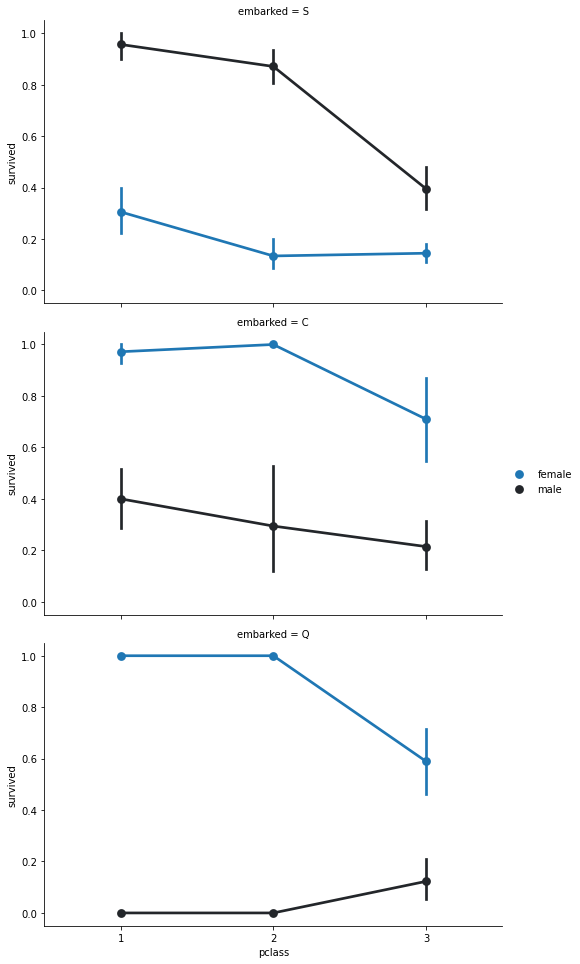

In [8]:
fg = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
fg.map(sns.pointplot, 'pclass', 'survived', 'sex')
fg.add_legend()

array([-1.85261719, -0.16555741, -0.5961096 , -0.29915732,  0.27030208,
        0.40331255,  2.70157594,  2.65781784,  0.19841769, -0.31507727,
       -0.32339665,  1.54385556,  1.86880888,  2.05236482,  2.35401336,
        1.97120479, -0.36589767, -0.18388674, -1.00621521, -2.5379925 ,
       -3.3337266 , -4.2846869 , -4.18720388, -5.43998917, -6.35550503,
       -5.86438546, -5.15574548, -6.12352057, -6.93660297, -6.77740643])